In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Prediction for movie
#importing appropriate modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
#Creating an dataframe
dataframe = pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv', encoding='ISO-8859-1')
dataframe


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataframe.shape

(15509, 10)

In [4]:
#Cleaning the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#Checking NaN values!
dataframe.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
dataframe.duplicated().sum()

6

In [7]:
#Handling the duplicated values
dataframe.drop_duplicates(inplace=True)

In [8]:
#printing the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  object 
 2   Duration  7239 non-null   object 
 3   Genre     13627 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14979 non-null  object 
 7   Actor 1   13888 non-null  object 
 8   Actor 2   13122 non-null  object 
 9   Actor 3   12363 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [9]:
#displaying the shape of dataframe
dataframe.shape

(15503, 10)

In [10]:
# 1️⃣ Clean 'Year' column safely
dataframe['Year'] = dataframe['Year'].astype(str).str.replace(r'\(|\)', '', regex=True)
dataframe['Year'] = pd.to_numeric(dataframe['Year'], errors='coerce')   # invalid -> NaN

# 2️⃣ Clean 'Duration' column safely
dataframe['Duration'] = dataframe['Duration'].astype(str).str.replace(' min', '', regex=False)
dataframe['Duration'] = pd.to_numeric(dataframe['Duration'], errors='coerce')

# 3️⃣ Clean 'Votes' column safely
dataframe['Votes'] = dataframe['Votes'].astype(str).str.replace(',', '', regex=False)
dataframe['Votes'] = pd.to_numeric(dataframe['Votes'], errors='coerce')


In [11]:
dataframe.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [12]:
dataframe

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      14976 non-null  float64
 2   Duration  7239 non-null   float64
 3   Genre     13627 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14979 non-null  object 
 7   Actor 1   13888 non-null  object 
 8   Actor 2   13122 non-null  object 
 9   Actor 3   12363 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.3+ MB


In [14]:
# Basic Exploratory Data  Analysis
dataframe.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15503,14976.000000,7239.000000,13627,7919.000000,7919.000000,14979,13888,13122,12363
unique,13838,NaN,NaN,485,NaN,NaN,5938,4718,4891,4820
top,Anjaam,NaN,NaN,Drama,NaN,NaN,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,NaN,2779,NaN,NaN,58,158,83,91
mean,NaN,1987.006677,128.127918,NaN,5.841621,1938.520394,NaN,NaN,NaN,NaN
std,NaN,25.417491,28.914476,NaN,1.381777,11602.415952,NaN,NaN,NaN,NaN
min,NaN,1913.000000,2.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1968.000000,110.000000,NaN,4.900000,16.000000,NaN,NaN,NaN,NaN
50%,NaN,1991.000000,131.000000,NaN,6.000000,55.000000,NaN,NaN,NaN,NaN
75%,NaN,2009.000000,147.000000,NaN,6.800000,404.000000,NaN,NaN,NaN,NaN


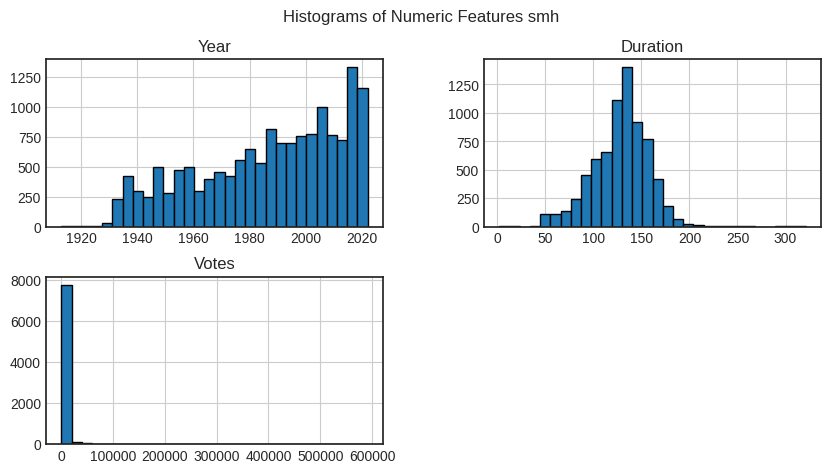

In [15]:
# Histogram for independent numeric features
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-white')

# Replace df with dataframe
dataframe[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black', figsize=(10, 5))

plt.suptitle('Histograms of Numeric Features smh')
plt.show()



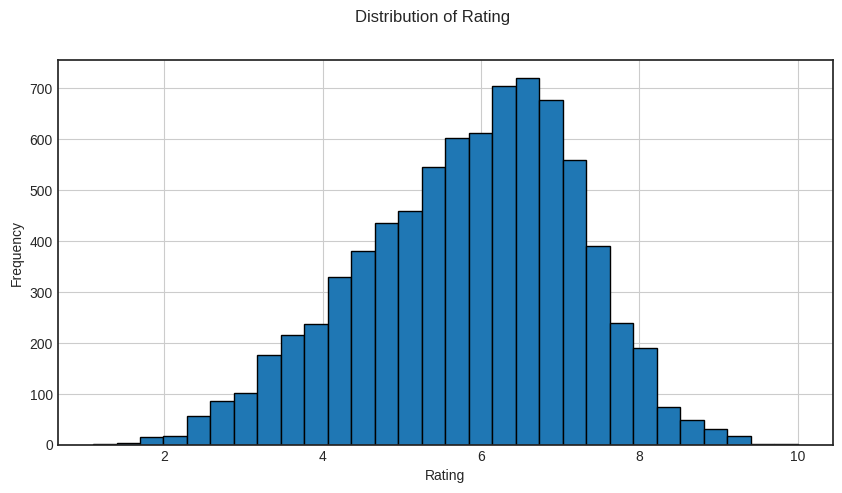

In [16]:
# Histogram of Ratings
import matplotlib.pyplot as plt

dataframe['Rating'].hist(bins=30, edgecolor='black', figsize=(10, 5))

plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


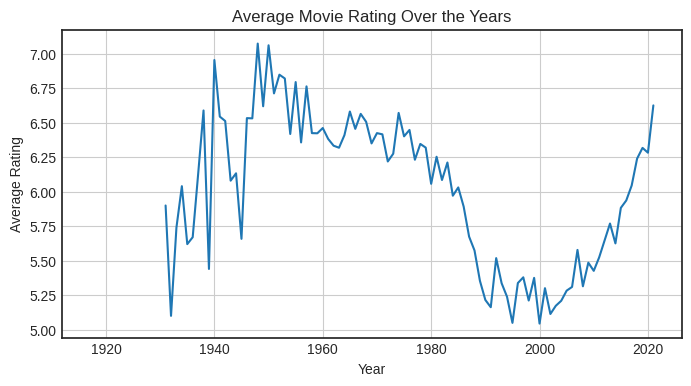

In [17]:
# Average Rating over the Years

# Calculate the average rating for each year
average_rating_per_year = dataframe.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()


In [18]:
# Drop the Name column
dataframe= dataframe.drop('Name',axis=1)

In [19]:
# Create new features based on average ratings

# Genre-wise average rating
Genre_Average_Rating = dataframe.groupby('Genre')['Rating'].transform('mean')
dataframe['Genre_Average_Rating'] = Genre_Average_Rating

# Director-wise average rating
Director_Average_Rating = dataframe.groupby('Director')['Rating'].transform('mean')
dataframe['Director_Average_Rating'] = Director_Average_Rating

# Actor 1 average rating
Actor1_Average_Rating = dataframe.groupby('Actor 1')['Rating'].transform('mean')
dataframe['Actor1_Average_Rating'] = Actor1_Average_Rating

# Actor 2 average rating
Actor2_Average_Rating = dataframe.groupby('Actor 2')['Rating'].transform('mean')
dataframe['Actor2_Average_Rating'] = Actor2_Average_Rating

# Actor 3 average rating
Actor3_Average_Rating = dataframe.groupby('Actor 3')['Rating'].transform('mean')
dataframe['Actor3_Average_Rating'] = Actor3_Average_Rating
dataframe


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.352082,5.700000,NaN,5.229412,NaN
1,2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.352082,7.000000,6.850000,7.000000,7.000000
2,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.493103,NaN,7.000000,7.350000,NaN
3,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.722500,4.400000,5.420000,4.400000,4.450000
4,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.352082,6.333333,7.000000,5.742857,5.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.092566,4.075000,6.025532,3.700000,4.600000
15505,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.468266,5.225000,5.481707,4.645455,5.617143
15506,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,5.092566,NaN,NaN,NaN,NaN
15507,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,5.092566,NaN,NaN,NaN,NaN


In [20]:
# 1️⃣ Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop rows where Rating is missing (target should never have NaN)
dataframe = dataframe.dropna(subset=['Rating'])

# Define features and target
x = dataframe[['Year', 'Votes', 'Duration',
               'Genre_Average_Rating', 'Director_Average_Rating',
               'Actor1_Average_Rating', 'Actor2_Average_Rating',
               'Actor3_Average_Rating']]

y = dataframe['Rating']

# Fill missing feature values
x = x.fillna(0)

# Ensure all feature columns are numeric
x = x.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 2️⃣ Model Training
model = LinearRegression()
model.fit(x_train, y_train)

# 3️⃣ Predictions
y_pred = model.predict(x_test)


# 4️⃣ (Optional but Recommended) Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 0.54
R² Score: 0.66


In [21]:
# Ensure numeric features
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
fitted_model_lr = LinearRegression()
fitted_model_lr.fit(x_train, y_train)
y_pred_lr = fitted_model_lr.predict(x_test)

# Train Random Forest
fitted_model_rf = RandomForestRegressor()
fitted_model_rf.fit(x_train, y_train)
y_pred_rf = fitted_model_rf.predict(x_test)
print(x_train.dtypes)   # Should now show int64 or float64




Year                       float64
Votes                      float64
Duration                   float64
Genre_Average_Rating       float64
Director_Average_Rating    float64
Actor1_Average_Rating      float64
Actor2_Average_Rating      float64
Actor3_Average_Rating      float64
dtype: object


In [22]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


MSE_lr =  mean_squared_error(y_test, y_pred_lr) 
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

MSE_rf =  mean_squared_error(y_test, y_pred_rf) 
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.6341321618503396
Mean absolute error value is:  0.5449072125476874
R2 score value is:  0.6589119655116448

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.377386976010101
Mean absolute error value is:  0.4113207070707071
R2 score value is:  0.797010481989764


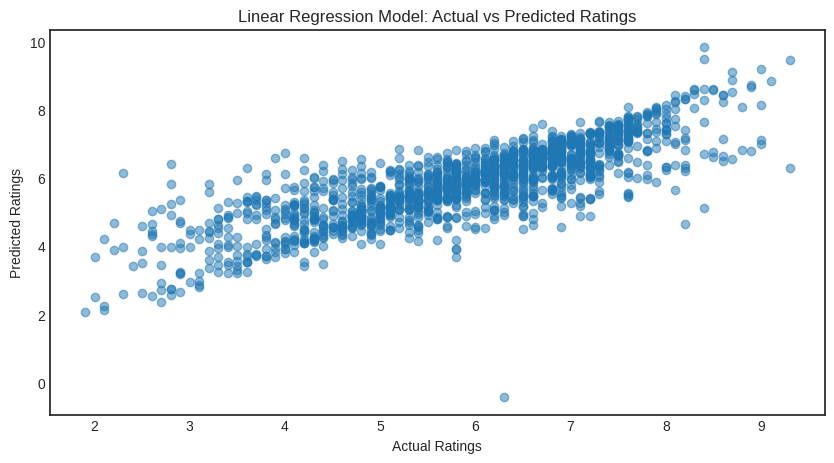

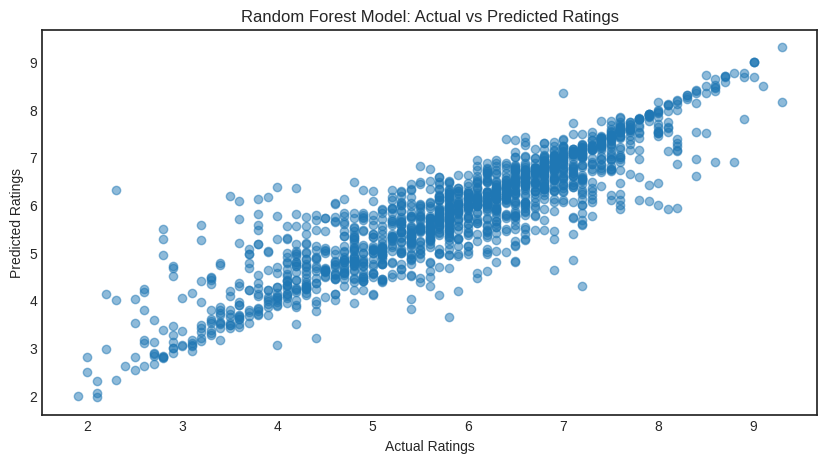

In [23]:
# Scatter plot for Linear Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Random Forest model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [24]:
x.head(10)

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019.0,8.0,109.0,6.352082,7.000000,6.850000,7.000000,7.000000
3,2019.0,35.0,110.0,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997.0,827.0,147.0,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005.0,1086.0,142.0,6.820000,7.500000,5.356000,6.050000,6.500000
8,2012.0,326.0,82.0,5.463636,5.600000,5.600000,5.883333,5.600000
9,2014.0,11.0,116.0,5.274074,4.000000,4.000000,4.550000,4.000000
10,2004.0,17.0,96.0,6.352082,6.200000,5.235294,5.361538,5.233333
11,2016.0,59.0,120.0,4.635659,6.950000,5.780000,5.900000,5.900000
12,1991.0,983.0,161.0,5.400000,4.790000,5.123636,5.759259,5.164286
13,2012.0,512.0,166.0,5.739906,5.700000,6.300000,5.700000,5.700000


In [25]:
y.head(10)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
Name: Rating, dtype: float64

In [26]:
# Create new trial dataframe to testing

data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

In [27]:
# Predict rating using trial data
predict_rating = fitted_model_rf.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.716999999999998


In [28]:
# Predict on your x_test
y_pred_submission = fitted_model_rf.predict(x_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': x_test.index,      
    'Rating': y_pred_submission
})

# Save to CSV 
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")


Submission file 'submission.csv' created successfully.
